In [1]:
import numpy as np

from linear_regression import LinearRegression as MyLinearRegression
from sklearn.linear_model import LinearRegression, Ridge, Lasso

import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.model_selection import train_test_split

from sklearn.datasets import make_regression

from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
RANDOM_STATE = 42

Сгенерируем данные для регрессии:

In [3]:
n_samples = 1000
n_outliers = 50

X, y, coef = make_regression(
    n_samples=n_samples, n_features=1,
    n_informative=1, noise=10,
    coef=True, random_state=RANDOM_STATE
)

# Add outlier data
np.random.seed(RANDOM_STATE)
X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1))
y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)

Разобьем данные на тренировочную и обучающую выборки:

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=RANDOM_STATE
)

Посмотрим на данные:

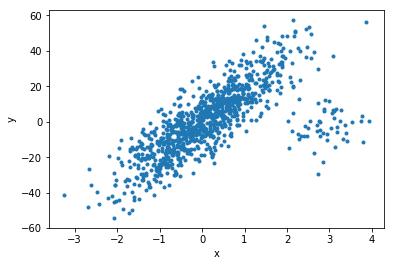

In [5]:
plt.plot(X, y, ".");
plt.xlabel("x");
plt.ylabel("y");

Обучим линейную модель и обучим ее на тренировочных данных:Ъ

In [6]:
linear_regression_model = LinearRegression()

linear_regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Сделаем предикт на тестовых данных:

In [7]:
y_hat = linear_regression_model.predict(X_test)

Посмотрим на значения метрик:

In [8]:
print("MAE:", mean_absolute_error(y_test, y_hat))
print("MSE:", mean_squared_error(y_test, y_hat))
print("R^2 score:", r2_score(y_test, y_hat))

MAE: 9.940362029807723
MSE: 173.1929838913916
R^2 score: 0.47263462857304817


Посмотрим на веса обученной модели:

In [9]:
print(linear_regression_model.coef_)
print(linear_regression_model.intercept_)

[11.3272569]
-1.3555932515073643


Визуализируем:

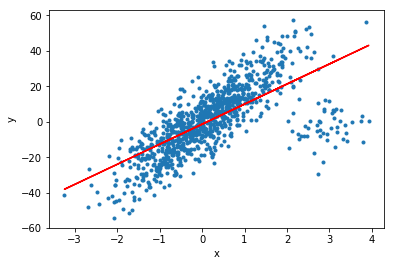

In [10]:
plt.plot(X, y, ".");
plt.plot(X, X * linear_regression_model.coef_ + linear_regression_model.intercept_, "r")
plt.xlabel("x");
plt.ylabel("y");

---

In [11]:
# TODO: выполните то же самое с написанной вами моделью:
# 1. обучите ее на (X_train, y_train)
#   * попробуйте обучать с регуляризацией и без
#   * пробуйте различные гиперпараметры (шаг градиента, коэффицент регуляризации)
# 2. оцените кач-во на X_test, используя все написанные вами метрики
# 3. сравните значения метрик с значениями метрик из sklearn.metrics
# 4. визуализируйте y = k * x + b, где k и b -- bias и вес вашей модели

# Без регуляризации

In [12]:
# 1. Создание линейной модели и обучение ее на тренировочных данных (X_train, y_train)
my_lin_reg_model = MyLinearRegression()

my_lin_reg_model.fit(X_train, y_train, lambda_coef=0.2, regularization=None, alpha=0.0)

In [13]:
# 2. Оценка качества на X_test, используя все написанные метрики
y_hat = my_lin_reg_model.predict(X_test)

print(my_lin_reg_model.coef_)
print(my_lin_reg_model.intercept_)

my_lin_reg_model.get_weights()

[11.32671958]
-1.354326026141654


array([-1.35432603, 11.32671958])

In [14]:
# 3. Сравнение значения метрик с значениями метрик из sklearn.metrics
print("Sklearn:")
print("MAE:", mean_absolute_error(y_test, y_hat))
print("MSE:", mean_squared_error(y_test, y_hat))
print("R^2 score:", r2_score(y_test, y_hat))

print("\nReleased:")
print("MAE:", metrics.mae(y_test, y_hat))
print("MSE:", metrics.mse(y_test, y_hat))
print("R^2 score:", metrics.r2_score(y_test, y_hat))

print("\nDiff:")
print("MAE:", mean_absolute_error(y_test, y_hat) - metrics.mae(y_test, y_hat))
print("MSE:", mean_squared_error(y_test, y_hat) - metrics.mse(y_test, y_hat))
print("R^2 score:", r2_score(y_test, y_hat) - metrics.r2_score(y_test, y_hat))

Sklearn:
MAE: 9.940357905044655
MSE: 173.1931102187424
R^2 score: 0.47263424391156383

Released:
MAE: 9.940357905044655
MSE: 173.1931102187424
R^2 score: 0.47263424391156383

Diff:
MAE: 0.0
MSE: 0.0
R^2 score: 0.0


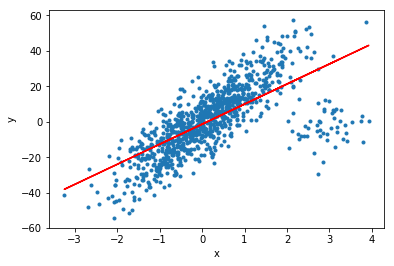

In [15]:
# 4. визуализация y = k * x + b, где k и b -- bias и вес вашей модели
plt.plot(X, y, ".");
plt.plot(X, my_lin_reg_model.coef_ * X + my_lin_reg_model.intercept_, "r")
plt.xlabel("x");
plt.ylabel("y");

# Регуляризация L1

In [16]:
# 1. Создание линейной модели и обучение ее на тренировочных данных (X_train, y_train)
my_lin_reg_model = MyLinearRegression()

my_lin_reg_model.fit(X_train, y_train, lambda_coef=0.2, regularization="L1", alpha=1.0)

In [17]:
# 2. Оценка качества на X_test, используя все написанные метрики
y_hat = my_lin_reg_model.predict(X_test)

print(my_lin_reg_model.coef_)
print(my_lin_reg_model.intercept_)

my_lin_reg_model.get_weights()

[11.32625224]
-1.3549894079394564


array([-1.35498941, 11.32625224])

In [18]:
# 3. Сравнение значения метрик с значениями метрик из sklearn.metrics
print("Sklearn:")
print("MAE:", mean_absolute_error(y_test, y_hat))
print("MSE:", mean_squared_error(y_test, y_hat))
print("R^2 score:", r2_score(y_test, y_hat))

print("\nReleased:")
print("MAE:", metrics.mae(y_test, y_hat))
print("MSE:", metrics.mse(y_test, y_hat))
print("R^2 score:", metrics.r2_score(y_test, y_hat))

print("\nDiff:")
print("MAE:", mean_absolute_error(y_test, y_hat) - metrics.mae(y_test, y_hat))
print("MSE:", mean_squared_error(y_test, y_hat) - metrics.mse(y_test, y_hat))
print("R^2 score:", r2_score(y_test, y_hat) - metrics.r2_score(y_test, y_hat))

Sklearn:
MAE: 9.940504124089603
MSE: 173.19214186955753
R^2 score: 0.47263719249421476

Released:
MAE: 9.940504124089603
MSE: 173.19214186955753
R^2 score: 0.47263719249421476

Diff:
MAE: 0.0
MSE: 0.0
R^2 score: 0.0


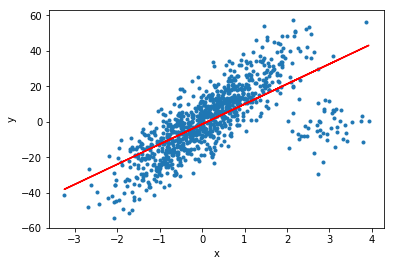

In [19]:
# 4. визуализация y = k * x + b, где k и b -- bias и вес вашей модели
plt.plot(X, y, ".");
plt.plot(X, my_lin_reg_model.coef_ * X + my_lin_reg_model.intercept_, "r")
plt.xlabel("x");
plt.ylabel("y");

# Регуляризация L2

In [20]:
# 1. Создание линейной модели и обучение ее на тренировочных данных (X_train, y_train)
my_lin_reg_model = MyLinearRegression()

my_lin_reg_model.fit(X_train, y_train, lambda_coef=0.2, regularization="L2", alpha=100.0)

In [21]:
# 2. Оценка качества на X_test, используя все написанные метрики
y_hat = my_lin_reg_model.predict(X_test)

print(my_lin_reg_model.coef_)
print(my_lin_reg_model.intercept_)

my_lin_reg_model.get_weights()

[10.15385027]
-0.9986484033292191


array([-0.9986484 , 10.15385027])

In [22]:
# 3. Сравнение значения метрик с значениями метрик из sklearn.metrics
print("Sklearn:")
print("MAE:", mean_absolute_error(y_test, y_hat))
print("MSE:", mean_squared_error(y_test, y_hat))
print("R^2 score:", r2_score(y_test, y_hat))

print("\nReleased:")
print("MAE:", metrics.mae(y_test, y_hat))
print("MSE:", metrics.mse(y_test, y_hat))
print("R^2 score:", metrics.r2_score(y_test, y_hat))

print("\nDiff:")
print("MAE:", mean_absolute_error(y_test, y_hat) - metrics.mae(y_test, y_hat))
print("MSE:", mean_squared_error(y_test, y_hat) - metrics.mse(y_test, y_hat))
print("R^2 score:", r2_score(y_test, y_hat) - metrics.r2_score(y_test, y_hat))

Sklearn:
MAE: 10.200489358437279
MSE: 173.84225602134336
R^2 score: 0.4706576221708496

Released:
MAE: 10.200489358437279
MSE: 173.84225602134336
R^2 score: 0.4706576221708496

Diff:
MAE: 0.0
MSE: 0.0
R^2 score: 0.0


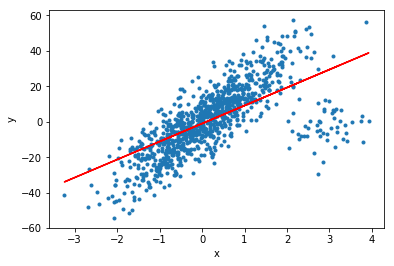

In [23]:
# 4. визуализация y = k * x + b, где k и b -- bias и вес вашей модели
plt.plot(X, y, ".");
plt.plot(X, my_lin_reg_model.coef_ * X + my_lin_reg_model.intercept_, "r")
plt.xlabel("x");
plt.ylabel("y");